# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [ ]:
#%pip install TA-Lib


In [1]:
from stock_price_downloader import StockPriceDownloader

import talib as ta
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Crear instancia
df = StockPriceDownloader('AAPL', '2022-01-01')
# Descargar datos
df = df.download_data()

df

[*********************100%***********************]  1 of 1 completed

Successfully downloaded 1037 records


Price,close,high,low,open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.103622,178.954960,173.895923,174.013342,104487900
2022-01-04,175.843246,179.013714,175.275693,178.710370,99310400
2022-01-05,171.165833,176.303156,170.891843,175.755177,94537600
2022-01-06,168.308487,171.537664,167.956213,168.993460,96904000
2022-01-07,168.474823,170.402543,167.359291,169.179371,86709100
...,...,...,...,...,...
2026-02-13,255.779999,262.230011,255.449997,262.010010,56290700
2026-02-17,263.880005,266.290009,255.539993,258.049988,58469100


In [3]:
for t in [5, 21, 63]:
    print(t)

5
21
63


In [4]:
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'svg'

In [6]:
for t in [5, 21, 63]:
    df[f'SMA_{t}'] = ta.SMA(df['close'],
                               timeperiod=t)

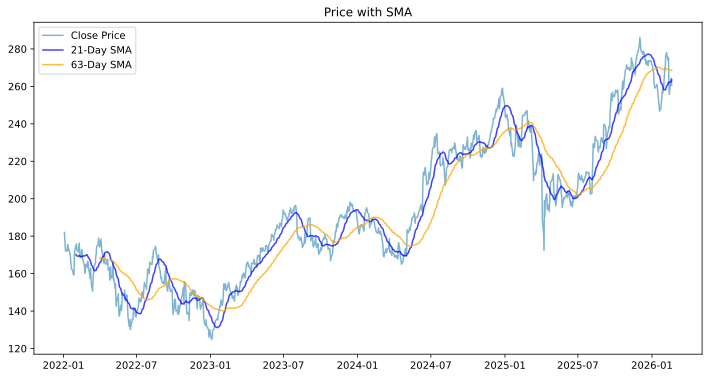

In [7]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

plt.title('Price with SMA')
plt.legend()
plt.show()

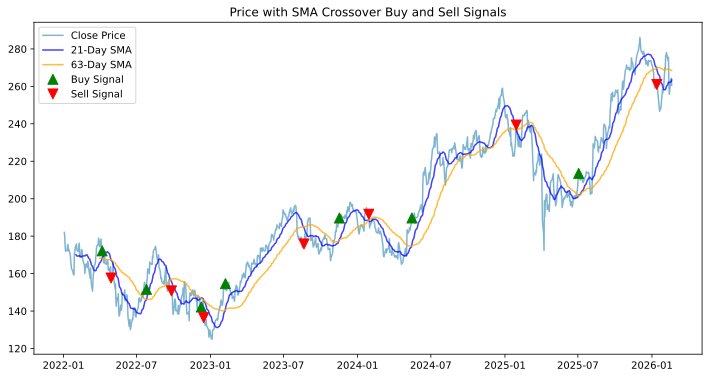

In [8]:
# Generate Buy and Sell signals
df['Buy_Signal'] = np.where((df['SMA_21'] > df['SMA_63']) & (df['SMA_21'].shift(1) <= df['SMA_63'].shift(1)), 1, 0)
df['Sell_Signal'] = np.where((df['SMA_21'] < df['SMA_63']) & (df['SMA_21'].shift(1) >= df['SMA_63'].shift(1)), -1, 0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot Closing Price and SMAs
plt.plot(df['close'], label='Close Price', alpha=0.5)
plt.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
plt.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')

# Plot Buy Signals
plt.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell Signals
plt.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Price with SMA Crossover Buy and Sell Signals')
plt.legend()
plt.show()

In [9]:
df['position'] = np.where((df['SMA_21'] > df['SMA_63']),  
                             1,  
                             -1) 

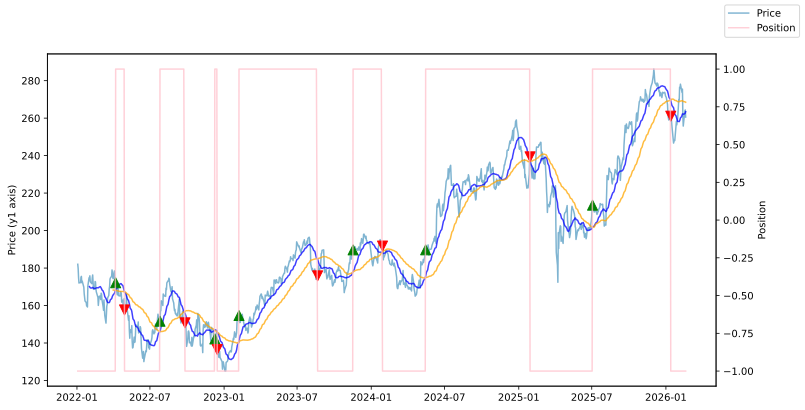

In [10]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator


fig,ax1 = plt.subplots(figsize=(12, 6))
l1, = ax1.plot(df.index, df['close'], label='Close Price', alpha=0.5) #Your Price field
ax1.set_ylabel('Price (y1 axis)')
ax1.plot(df['SMA_21'], label='21-Day SMA', alpha=0.75, color='blue')
ax1.plot(df['SMA_63'], label='63-Day SMA', alpha=0.75, color='orange')
ax1.plot(df[df['Buy_Signal'] == 1].index, df['close'][df['Buy_Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
ax1.plot(df[df['Sell_Signal'] == -1].index, df['close'][df['Sell_Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')


ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

In [ ]:
df['Returns'] = np.log(df['close'] / df['close'].shift(1))
df['Strategy'] = df['position'].shift(1) * df['Returns']  
df.round(4).head()
df = df.dropna(how='all')

In [ ]:
df.dropna(inplace=True)


In [ ]:
np.exp(df[['Returns', 'Strategy']].sum())  


In [ ]:
df[['Returns', 'Strategy']].std() * 252 ** 0.5


In [ ]:
ax1 = df[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(12,5))

ax2 = ax1.twinx() ##Using twinx to make ax2 as secondary axis for ax1
l2, = ax2.plot(df.index,df['position'], alpha=0.75, color='pink') #Your sales field
ax2.set_ylabel('Position')

fig.legend([l1, l2], ["Price", "Position"])

xtick_locator = AutoDateLocator()
xtick_formatter = AutoDateFormatter(xtick_locator)

ax1.xaxis.set_major_locator(xtick_locator)
ax1.xaxis.set_major_formatter(xtick_formatter)

ax1.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch15/strat_plot_03.png');